In [1]:
import os
import matplotlib.pyplot as plt

from globalfunction import vv

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:


import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



fetch_housing_data()



In [4]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7ff32cc7edc0>)

In [5]:


import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Saving figure california_housing_prices_plot


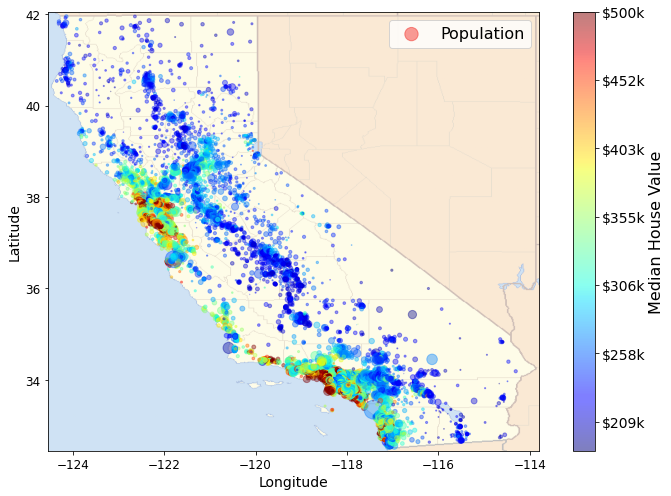

In [6]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

# New Attempt

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

party = pd.read_csv(vv.LISTING_JSON_MODEL_FILE)
party.head(1)

/tmp/ipykernel_5181/1228074493.py:5: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  party = pd.read_csv(vv.LISTING_JSON_MODEL_FILE)


,id,keyFeatures,images,floorplans,virtualTours,industryAffiliations,rooms,nearestAirports,nearestStations,showSchoolInfo,...,sharedOwnership.rentPrice,sharedOwnership.rentFrequency,livingCosts.councilTaxExempt,livingCosts.councilTaxIncluded,livingCosts.annualGroundRent,livingCosts.groundRentReviewPeriodInYears,livingCosts.groundRentPercentageIncrease,livingCosts.annualServiceCharge,livingCosts.councilTaxBand,livingCosts.domesticRates
0,124126712,['QUIET AREA SURROUNDED BY ELMSTEAD &amp; MARV...,[{'url': 'https://media.rightmove.co.uk/18k/17...,[{'url': 'https://media.rightmove.co.uk/18k/17...,[],[{'name': 'Association of Residential Letting ...,[],[],"[{'name': 'Elmstead Woods Station', 'types': [...",True,...,NaN,not specified,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#party['location.longitude'].value_counts()
#party[party['location.longitude'].isna()]
#party['location.longitude'].dtype

In [9]:
#party['location.latitude'].value_counts()
#party[party['location.latitude'].isna()]
#party[party['location.latitude'] > 50]
#party['location.latitude'].dtype
party = pd.read_csv(vv.LISTING_JSON_MODEL_FILE)
party = party.set_index('id')

/tmp/ipykernel_5181/1864684045.py:5: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  party = pd.read_csv(vv.LISTING_JSON_MODEL_FILE)


In [10]:
party['prices.primaryPrice']

id
124126712    £395,000
122078540    £100,000
123967277    £600,000
123772928    £830,000
85455351     £475,000
               ...   
113116313    £299,990
124851245    £149,995
79286403     £290,000
124785005    £250,000
84048834     £106,250
Name: prices.primaryPrice, Length: 36905, dtype: object

In [11]:
party = party[~party.index.duplicated(keep='last')]
party = party[party["location.longitude"] < 10]
party["location.latitude"] = pd.to_numeric(party["location.latitude"], 'coerce').dropna().astype(float)
party["location.longitude"] = pd.to_numeric(party["location.longitude"], 'coerce').dropna().astype(float)


party["prices.primaryPrice"] = party['prices.primaryPrice'].str.extract('(\d+)')+"000"
party["prices.primaryPrice"] = pd.to_numeric(party["prices.primaryPrice"], 'coerce').dropna().astype(int)

In [12]:
party.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32868 entries, 124126712 to 84048834
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   keyFeatures                                         32868 non-null  object 
 1   images                                              32868 non-null  object 
 2   floorplans                                          32868 non-null  object 
 3   virtualTours                                        32868 non-null  object 
 4   industryAffiliations                                32868 non-null  object 
 5   rooms                                               32868 non-null  object 
 6   nearestAirports                                     32868 non-null  object 
 7   nearestStations                                     32868 non-null  object 
 8   showSchoolInfo                                      32868 non-nul

In [13]:
party["location.longitude"]

id
124126712    0.043300
122078540   -0.010963
123772928    0.044054
85455351     0.103321
111715091   -0.064641
               ...   
113116313   -0.203404
124851245   -0.008870
79286403    -0.180796
124785005    0.052601
84048834     0.018970
Name: location.longitude, Length: 32868, dtype: float64

In [14]:
party["location.latitude"]

id
124126712    51.424330
122078540    51.406952
123772928    51.375507
85455351     51.378744
111715091    51.406578
               ...    
113116313    51.420212
124851245    51.527740
79286403     51.423423
124785005    51.552595
84048834     51.508740
Name: location.latitude, Length: 32868, dtype: float64

(-0.498166, 0.279356)
(51.29832, 51.683185)


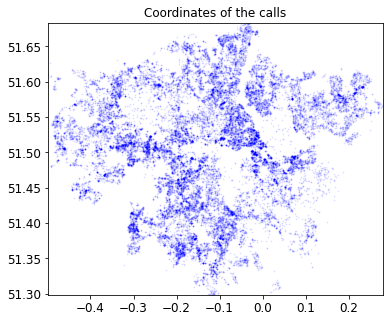

In [15]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
city_long_border = (party["location.longitude"].min(), party["location.longitude"].max())
city_lat_border = (party["location.latitude"].min(), party["location.latitude"].max())
print(city_long_border)
print(city_lat_border)
# ax = plt.scatter(party['Longitude'].values, party['Latitude'].values, color='blue', s=0.5, label='train', alpha=0.1)
ax = plt.scatter(party['location.longitude'].values, party['location.latitude'].values, color='blue', s=0.5, label='train', alpha=0.1)
ax.axes.set_title('Coordinates of the calls')
ax.figure.set_size_inches(6,5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

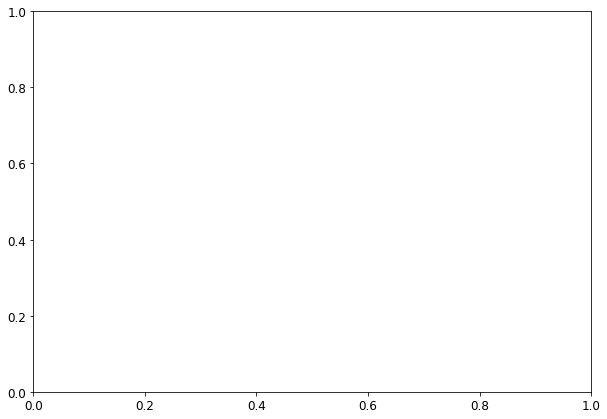

In [16]:
import matplotlib.image as mpimg
#california_img=mpimg.imread(os.path.join(images_path, filename))
ax = party.plot(kind="scatter", x="location.longitude", y="location.latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
#plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
#           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

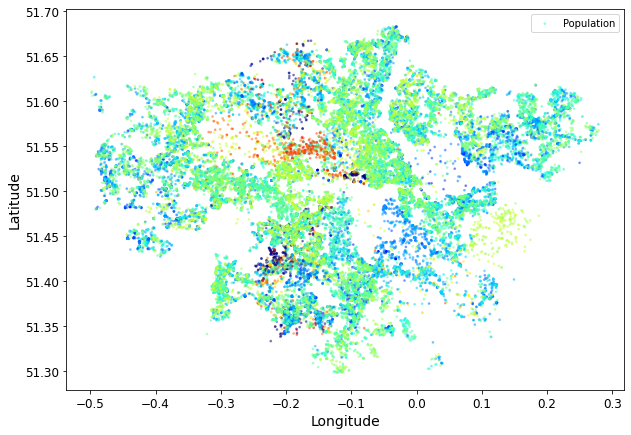

In [17]:
import matplotlib.image as mpimg
#california_img=mpimg.imread(os.path.join(images_path, filename))
ax = party.plot(kind="scatter", x="location.longitude", y="location.latitude", figsize=(10,7),
                  #s=housing['population']/100, label="Population",
                  s=3, label="Population",
                  c="prices.primaryPrice", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
#plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
#           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = party["prices.primaryPrice"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()